<br>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Intrusion Detection Systems</h2> 
<br>

# Problem Statement
With the dramatic growth of computer networks usage and the huge increase in the number of applications running on top of it, network security is becoming increasingly while the all the systems suffers from security vulnerabilities, which could increase the attacks that could negatively affects the economy.
Therefore detecting vulnerabilities in the system in the network has been more important and need to be done as accurate as possible in real time.
in this notebook a model will be created and trained using SVM classifier to distengush if there is an attack or not in the network packet.


## Intrusion detection systems
* Host-Based IDS (HIDS): A host-based IDS is deployed on a particular endpoint and designed to protect it against internal and external threats. Such an IDS may have the ability to monitor network traffic to and from the machine, observe running processes, and inspect the system’s logs. A host-based IDS’s visibility is limited to its host machine, decreasing the available context for decision-making, but has deep visibility into the host computer’s internals.
* Network-Based IDS (NIDS): A network-based IDS solution is designed to monitor an entire protected network. It has visibility into all traffic flowing through the network and makes determinations based upon packet metadata and contents. This wider viewpoint provides more context and the ability to detect widespread threats; however, these systems lack visibility into the internals of the endpoints that they protect.

Detection Method of IDS:

* Signature-based Method:
Signature-based IDS detects the attacks on the basis of the specific patterns such as number of bytes or number of 1’s or number of 0’s in the network traffic. It also detects on the basis of the already known malicious instruction sequence that is used by the malware. The detected patterns in the IDS are known as signatures.
Signature-based IDS can easily detect the attacks whose pattern (signature) already exists in system but it is quite difficult to detect the new malware attacks as their pattern (signature) is not known.

* Anomaly-based Method:
Anomaly-based IDS was introduced to detect unknown malware attacks as new malware are developed rapidly. In anomaly-based IDS there is use of machine learning to create a trustful activity model and anything coming is compared with that model and it is declared suspicious if it is not found in model. Machine learning-based method has a better-generalized property in comparison to signature-based IDS as these models can be trained according to the applications and hardware configurations.

<a id="0"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px"> Data Collection</h2>

### Intrusion Detection Systems
#### Source : https://www.kaggle.com/code/nidhirastogi/network-intrusion-detection-using-python/input

<h2 style = "font-size:30px; font-family:Garamond ; font-weight : normal; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 5px">Table of Contents</h2>

   #### [1. Data Preparocessing](#1)
   #### [2. Explory Data Analysis](#2)
   #### [3. Data Scaleing and Labeling](#3)
   #### [4. Feature Selection](#4)
   #### [5. Train Test Split](#5)
   #### [6. Model Training and Testing](#6)
   #### [7. Hybrid Model](#7)
   #### [8. Pcikle File](#8)

## ***Importing necessary libraries***

In [311]:
# import relevant modules
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">1. Data Preprocessing</h2>

In [312]:
train = pd.read_csv("../data/Train_data.csv")
test = pd.read_csv("../data/Test_data.csv")

In [313]:
train.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal


In [314]:
train.shape

(25192, 42)

In [315]:
test.head(4)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.0,0.0


In [316]:
test.shape

(22544, 41)

In [317]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [318]:
train.duplicated().sum()

0

In [319]:
test.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [320]:
test.duplicated().sum()

57

In [321]:
test.drop_duplicates(inplace=True)

In [322]:
test.duplicated().sum()

0

In [323]:
train['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    25192
Name: count, dtype: int64

In [324]:
test['num_outbound_cmds'].value_counts()

num_outbound_cmds
0    22487
Name: count, dtype: int64

In [325]:
#'num_outbound_cmds' is a redundant column so remove it from both train & test datasets
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [326]:
# Attack Class Distribution
train['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

<a id="2"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">2. Exploratory Data Analysis</h2>

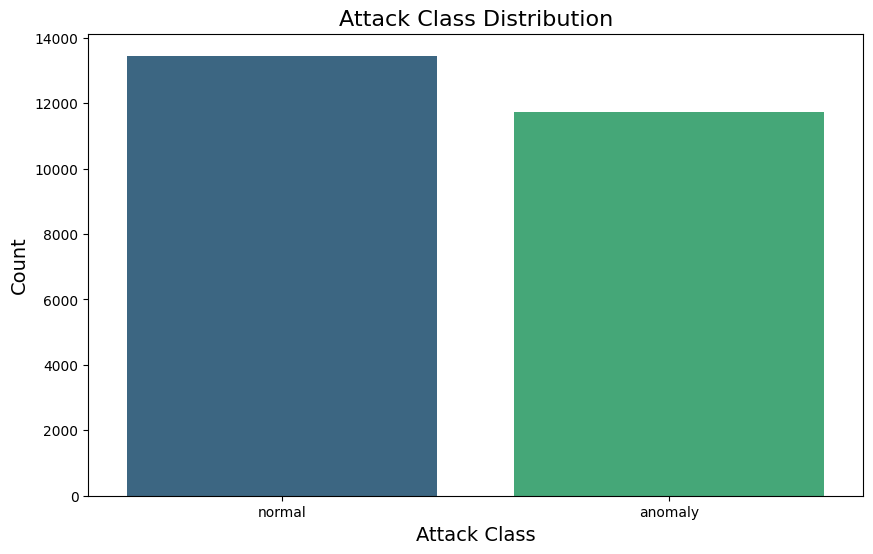

In [327]:
# Generate countplot for 'class' column
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=train, palette='viridis')
plt.title('Attack Class Distribution', fontsize=16)
plt.xlabel('Attack Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

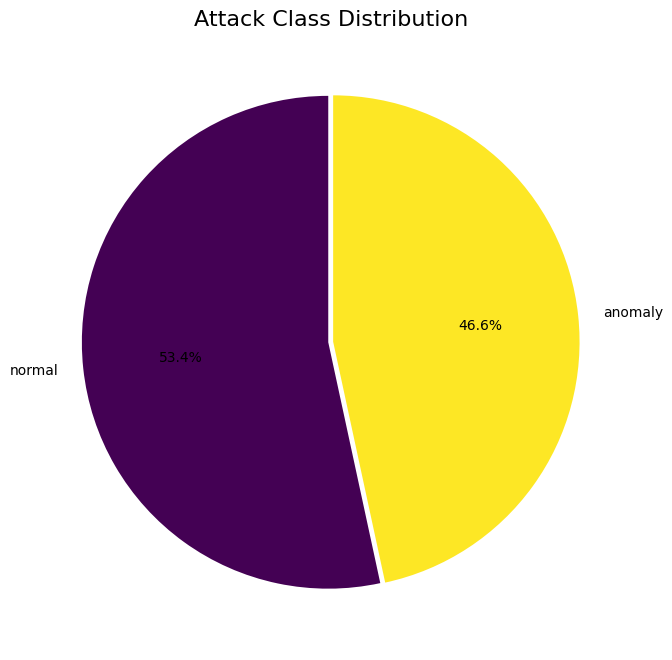

In [328]:
# Generate a pie chart for 'class' column distribution
plt.figure(figsize=(8, 8))
train['class'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis', explode=[0.01]*len(train['class'].unique()))
plt.title('Attack Class Distribution', fontsize=16)
plt.ylabel('')  # Remove y-label for a cleaner pie chart
plt.show()

In [329]:
# sns.pairplot(train,hue='class')

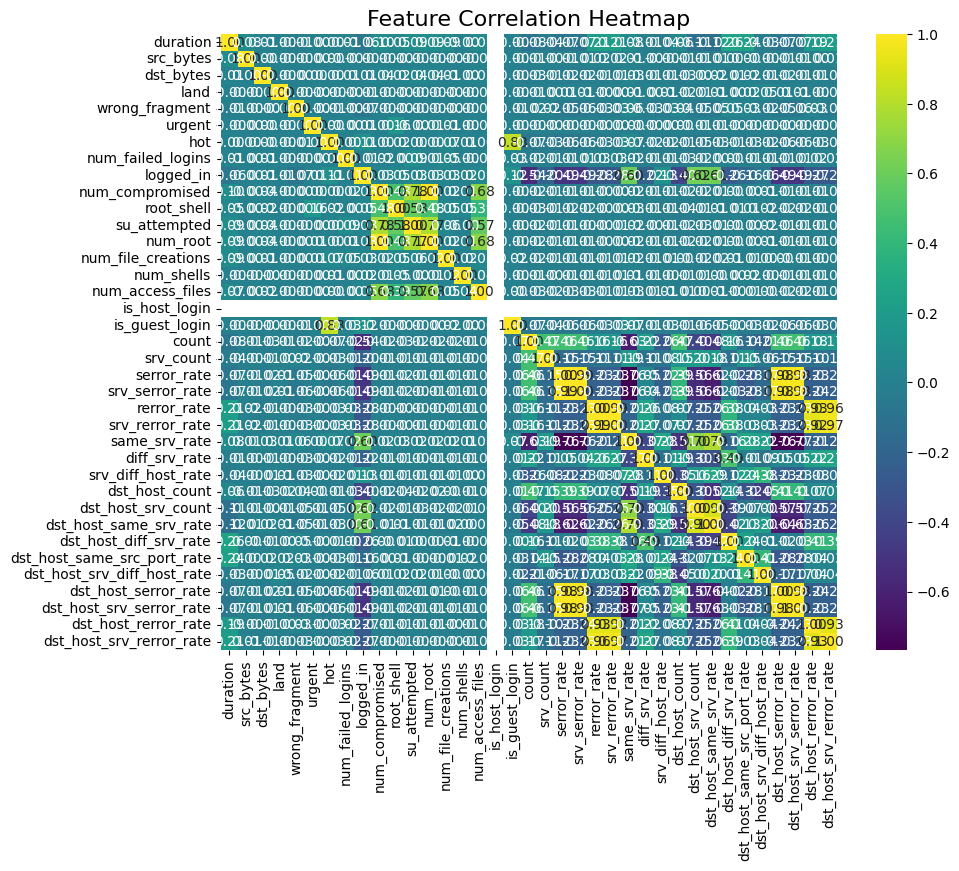

In [330]:
numeric_train = train.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_train.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis', cbar=True, square=True)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

In [331]:
train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate              

In [332]:
test.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate              

In [333]:
test

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00
22540,0,tcp,http,SF,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00


In [334]:
raw_data = test[['src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_same_src_port_rate',
 'protocol_type',
 'service',
 'flag']]

In [335]:
import pickle

pickle.dump(raw_data,open('../models/data.pkl','wb'))

In [336]:
raw_data.head()

,src_bytes,dst_bytes,count,same_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,dst_host_same_src_port_rate,protocol_type,service,flag
0,0,0,229,0.04,10,0.04,0.00,tcp,private,REJ
1,0,0,136,0.01,1,0.00,0.00,tcp,private,REJ
2,12983,0,1,1.00,86,0.61,0.61,tcp,ftp_data,SF
3,20,0,1,1.00,57,1.00,1.00,icmp,eco_i,SF
4,0,15,1,1.00,86,0.31,0.03,tcp,telnet,RSTO


In [337]:
raw_data.nunique()

src_bytes                      1149
dst_bytes                      3650
count                           495
same_srv_rate                    75
dst_host_srv_count              256
dst_host_same_srv_rate          101
dst_host_same_src_port_rate     101
protocol_type                     3
service                          64
flag                             11
dtype: int64

In [338]:
raw_data.min()

src_bytes                         0
dst_bytes                         0
count                             0
same_srv_rate                   0.0
dst_host_srv_count                0
dst_host_same_srv_rate          0.0
dst_host_same_src_port_rate     0.0
protocol_type                  icmp
service                         IRC
flag                            OTH
dtype: object

In [339]:
raw_data.max()

src_bytes                      62825648
dst_bytes                       1345927
count                               511
same_srv_rate                       1.0
dst_host_srv_count                  255
dst_host_same_srv_rate              1.0
dst_host_same_src_port_rate         1.0
protocol_type                       udp
service                           whois
flag                                 SH
dtype: object

In [340]:
raw_data.dtypes

src_bytes                        int64
dst_bytes                        int64
count                            int64
same_srv_rate                  float64
dst_host_srv_count               int64
dst_host_same_srv_rate         float64
dst_host_same_src_port_rate    float64
protocol_type                   object
service                         object
flag                            object
dtype: object

<a id="3"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">3. Data Scaleing and Labeling</h2>

In [341]:
from sklearn.preprocessing import StandardScaler

In [342]:
scaler = StandardScaler()

In [343]:
# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

In [344]:
# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [345]:
from sklearn.preprocessing import LabelEncoder

In [346]:
encoder = LabelEncoder()

In [347]:
# extract categorical attributes from both training and test sets 
cat_train = train.select_dtypes(include=['object']).copy()
cat_test = test.select_dtypes(include=['object']).copy()

In [348]:
# encode the categorical attributes
train_cat = cat_train.apply(encoder.fit_transform)
test_cat = cat_test.apply(encoder.fit_transform)

In [349]:
# separate target column from encoded data 
enc_train = train_cat.drop(['class'], axis=1)
cat_Ytrain = train_cat[['class']].copy()

In [350]:
train_x = pd.concat([sc_traindf,enc_train],axis=1)
train_y = train['class']
train_x.shape

(25192, 40)

In [351]:
test_df = pd.concat([sc_testdf,test_cat],axis=1)
test_df.shape

(22544, 40)

<a id="4"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">4. Feature Selection</h2>

In [352]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [353]:
# fit random forest classifier on the training set
rfc.fit(train_x, train_y)

RandomForestClassifier()

In [354]:
# extract important features
score = np.round(rfc.feature_importances_,3)

importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

<Axes: xlabel='feature'>

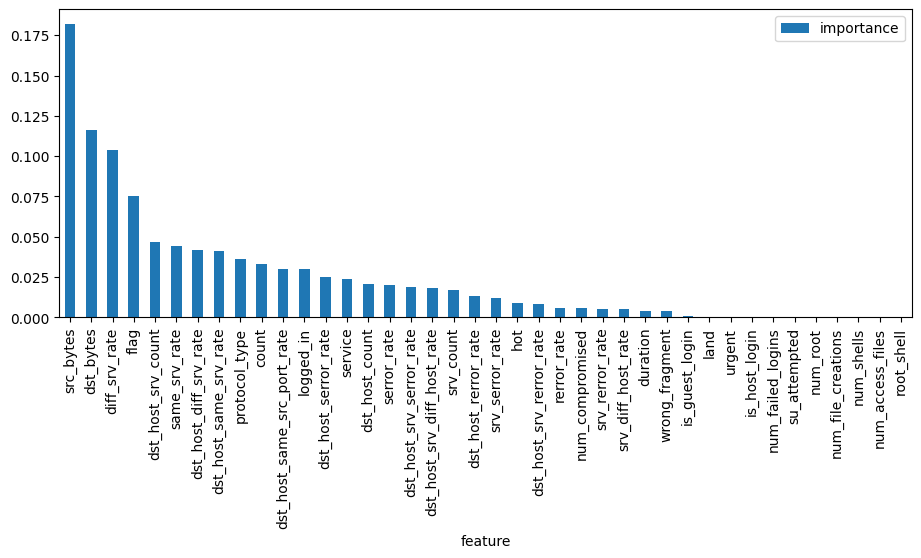

In [355]:
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()

In [356]:
from sklearn.feature_selection import RFE
import itertools

In [357]:
# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(train_x, train_y)

In [358]:
# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

In [359]:
selected_features

['src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'protocol_type',
 'service',
 'flag']

<a id="5"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">5. Train Test Split</h2>

In [360]:
X = train_x[selected_features]
y = train_y

In [361]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,train_size=0.75, random_state=2)

In [362]:
X_train.head(3)

,src_bytes,dst_bytes,count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,protocol_type,service,flag
594,-0.004601,-0.03931,-0.702802,0.772109,-0.349282,-0.470543,-0.422758,1,19,9
18835,-0.010093,-0.03931,1.738962,-1.388806,-0.013235,-1.003781,-1.113281,1,46,5
6545,-0.010093,-0.03931,1.346536,-1.434299,-0.069243,-0.967630,-0.979631,1,46,5


<a id="6"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">6. Model Training and Testing</h2>

In [363]:
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

In [364]:
# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train)

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train)

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [365]:
from sklearn import metrics

In [366]:
# Initialize models
BNB_Classifier = BernoulliNB()
DTC_Classifier = tree.DecisionTreeClassifier()
KNN_Classifier = KNeighborsClassifier()
LGR_Classifier = LogisticRegression()

## ***Train on Training Data***

In [367]:
# Naive Bayes Classifier Evaluation
print('============================== Naive Baye Classifier Evaluation ==============================')
bnb_scores = cross_val_score(BNB_Classifier, X_train, Y_train, cv=10)
BNB_Classifier.fit(X_train, Y_train)
bnb_accuracy = metrics.accuracy_score(Y_train, BNB_Classifier.predict(X_train))
bnb_confusion_matrix = metrics.confusion_matrix(Y_train, BNB_Classifier.predict(X_train))
bnb_classification = metrics.classification_report(Y_train, BNB_Classifier.predict(X_train))

print("Cross Validation Mean Score:\n", bnb_scores.mean())
print("\nModel Accuracy:\n", bnb_accuracy)
print("\nConfusion matrix:\n", bnb_confusion_matrix)
print("\nClassification report:\n", bnb_classification)
print()

============================== Naive Baye Classifier Evaluation ==============================
Cross Validation Mean Score:
 0.8757269740435436

Model Accuracy:
 0.8759923785328676

Confusion matrix:
 [[6952 1862]
 [ 481 9599]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.94      0.79      0.86      8814
      normal       0.84      0.95      0.89     10080

    accuracy                           0.88     18894
   macro avg       0.89      0.87      0.87     18894
weighted avg       0.88      0.88      0.87     18894




In [368]:
# Decision Tree Classifier Evaluation
print('============================== Decision Tree Classifier Evaluation ==============================')
dtc_scores = cross_val_score(DTC_Classifier, X_train, Y_train, cv=10)
DTC_Classifier.fit(X_train, Y_train)
dtc_accuracy = metrics.accuracy_score(Y_train, DTC_Classifier.predict(X_train))
dtc_confusion_matrix = metrics.confusion_matrix(Y_train, DTC_Classifier.predict(X_train))
dtc_classification = metrics.classification_report(Y_train, DTC_Classifier.predict(X_train))

print("Cross Validation Mean Score:\n", dtc_scores.mean())
print("\nModel Accuracy:\n", dtc_accuracy)
print("\nConfusion matrix:\n", dtc_confusion_matrix)
print("\nClassification report:\n", dtc_classification)
print()

============================== Decision Tree Classifier Evaluation ==============================
Cross Validation Mean Score:
 0.9957657392702389

Model Accuracy:
 1.0

Confusion matrix:
 [[ 8814     0]
 [    0 10080]]

Classification report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      8814
      normal       1.00      1.00      1.00     10080

    accuracy                           1.00     18894
   macro avg       1.00      1.00      1.00     18894
weighted avg       1.00      1.00      1.00     18894




In [369]:
# KNeighbors Classifier Evaluation
print('============================== KNeighbors Classifier Evaluation ==============================')
knn_scores = cross_val_score(KNN_Classifier, X_train, Y_train, cv=10)
KNN_Classifier.fit(X_train, Y_train)
knn_accuracy = metrics.accuracy_score(Y_train, KNN_Classifier.predict(X_train))
knn_confusion_matrix = metrics.confusion_matrix(Y_train, KNN_Classifier.predict(X_train))
knn_classification = metrics.classification_report(Y_train, KNN_Classifier.predict(X_train))

print("Cross Validation Mean Score:\n", knn_scores.mean())
print("\nModel Accuracy:\n", knn_accuracy)
print("\nConfusion matrix:\n", knn_confusion_matrix)
print("\nClassification report:\n", knn_classification)
print()

============================== KNeighbors Classifier Evaluation ==============================
Cross Validation Mean Score:
 0.9840689483251686

Model Accuracy:
 0.9886207261564518

Confusion matrix:
 [[8711  103]
 [ 112 9968]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99      8814
      normal       0.99      0.99      0.99     10080

    accuracy                           0.99     18894
   macro avg       0.99      0.99      0.99     18894
weighted avg       0.99      0.99      0.99     18894




In [370]:
# Logistic Regression Evaluation
print('============================== Logistic Regression Evaluation ==============================')
lgr_scores = cross_val_score(LGR_Classifier, X_train, Y_train, cv=10)
LGR_Classifier.fit(X_train, Y_train)
lgr_accuracy = metrics.accuracy_score(Y_train, LGR_Classifier.predict(X_train))
lgr_confusion_matrix = metrics.confusion_matrix(Y_train, LGR_Classifier.predict(X_train))
lgr_classification = metrics.classification_report(Y_train, LGR_Classifier.predict(X_train))

print("Cross Validation Mean Score:\n", lgr_scores.mean())
print("\nModel Accuracy:\n", lgr_accuracy)
print("\nConfusion matrix:\n", lgr_confusion_matrix)
print("\nClassification report:\n", lgr_classification)
print()

============================== Logistic Regression Evaluation ==============================
Cross Validation Mean Score:
 0.9296600760179372

Model Accuracy:
 0.9294485021700011

Confusion matrix:
 [[7898  916]
 [ 417 9663]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.95      0.90      0.92      8814
      normal       0.91      0.96      0.94     10080

    accuracy                           0.93     18894
   macro avg       0.93      0.93      0.93     18894
weighted avg       0.93      0.93      0.93     18894




# ***Train on test data***

In [371]:
# Naive Bayes Classifier Test Results
print('============================== Naive Bayes Classifier Test Results ==============================')
bnb_accuracy = metrics.accuracy_score(Y_test, BNB_Classifier.predict(X_test))
bnb_confusion_matrix = metrics.confusion_matrix(Y_test, BNB_Classifier.predict(X_test))
bnb_classification = metrics.classification_report(Y_test, BNB_Classifier.predict(X_test))

print("Model Accuracy:\n", bnb_accuracy)
print("\nConfusion matrix:\n", bnb_confusion_matrix)
print("\nClassification report:\n", bnb_classification)
print()

============================== Naive Bayes Classifier Test Results ==============================
Model Accuracy:
 0.871387742140362

Confusion matrix:
 [[2290  639]
 [ 171 3198]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.93      0.78      0.85      2929
      normal       0.83      0.95      0.89      3369

    accuracy                           0.87      6298
   macro avg       0.88      0.87      0.87      6298
weighted avg       0.88      0.87      0.87      6298




In [372]:
# Decision Tree Classifier Test Results
print('============================== Decision Tree Classifier Test Results ==============================')
dtc_accuracy = metrics.accuracy_score(Y_test, DTC_Classifier.predict(X_test))
dtc_confusion_matrix = metrics.confusion_matrix(Y_test, DTC_Classifier.predict(X_test))
dtc_classification = metrics.classification_report(Y_test, DTC_Classifier.predict(X_test))

print("Model Accuracy:\n", dtc_accuracy)
print("\nConfusion matrix:\n", dtc_confusion_matrix)
print("\nClassification report:\n", dtc_classification)
print()

============================== Decision Tree Classifier Test Results ==============================
Model Accuracy:
 0.9942838996506828

Confusion matrix:
 [[2916   13]
 [  23 3346]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.99      1.00      0.99      2929
      normal       1.00      0.99      0.99      3369

    accuracy                           0.99      6298
   macro avg       0.99      0.99      0.99      6298
weighted avg       0.99      0.99      0.99      6298




In [373]:
# KNeighbors Classifier Test Results
print('============================== KNeighbors Classifier Test Results ==============================')
knn_accuracy = metrics.accuracy_score(Y_test, KNN_Classifier.predict(X_test))
knn_confusion_matrix = metrics.confusion_matrix(Y_test, KNN_Classifier.predict(X_test))
knn_classification = metrics.classification_report(Y_test, KNN_Classifier.predict(X_test))

print("Model Accuracy:\n", knn_accuracy)
print("\nConfusion matrix:\n", knn_confusion_matrix)
print("\nClassification report:\n", knn_classification)
print()

============================== KNeighbors Classifier Test Results ==============================
Model Accuracy:
 0.9845982851698952

Confusion matrix:
 [[2883   46]
 [  51 3318]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.98      0.98      0.98      2929
      normal       0.99      0.98      0.99      3369

    accuracy                           0.98      6298
   macro avg       0.98      0.98      0.98      6298
weighted avg       0.98      0.98      0.98      6298




In [374]:
# Logistic Regression Test Results
print('============================== Logistic Regression Test Results ==============================')
lgr_accuracy = metrics.accuracy_score(Y_test, LGR_Classifier.predict(X_test))
lgr_confusion_matrix = metrics.confusion_matrix(Y_test, LGR_Classifier.predict(X_test))
lgr_classification = metrics.classification_report(Y_test, LGR_Classifier.predict(X_test))

print("Model Accuracy:\n", lgr_accuracy)
print("\nConfusion matrix:\n", lgr_confusion_matrix)
print("\nClassification report:\n", lgr_classification)
print()

============================== Logistic Regression Test Results ==============================
Model Accuracy:
 0.9214036201968879

Confusion matrix:
 [[2605  324]
 [ 171 3198]]

Classification report:
               precision    recall  f1-score   support

     anomaly       0.94      0.89      0.91      2929
      normal       0.91      0.95      0.93      3369

    accuracy                           0.92      6298
   macro avg       0.92      0.92      0.92      6298
weighted avg       0.92      0.92      0.92      6298




## ***Neural Networks Model***

Deep Feedforward Neural Network (FFNN)

In [375]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_test = label_encoder.transform(Y_test)

In [376]:
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [377]:
import tensorflow as tf
from tensorflow.keras import regularizers

model = tf.keras.Sequential([
    tf.keras.layers.Dense(
        units=64, 
        activation='relu', 
        input_shape=(X_train.shape[1:]), 
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-5)
    ),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(
        units=128, 
        activation='relu', 
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-5)
    ),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(
        units=512, 
        activation='relu', 
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-5)
    ),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(
        units=128, 
        activation='relu', 
        kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), 
        bias_regularizer=regularizers.L2(1e-4),
        activity_regularizer=regularizers.L2(1e-5)
    ),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(
        units=1, 
        activation='sigmoid'
    ),
])

In [378]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [379]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,865 (550.25 KB)

 Trainable params: 140,865 (550.25 KB)

 Non-trainable params: 0 (0.00 B)

In [380]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, verbose=1)

Epoch 1/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7686 - loss: 0.8203 - val_accuracy: 0.9490 - val_loss: 0.2593
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9422 - loss: 0.2760 - val_accuracy: 0.9547 - val_loss: 0.2304
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9495 - loss: 0.2299 - val_accuracy: 0.9465 - val_loss: 0.2148
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9488 - loss: 0.2157 - val_accuracy: 0.9536 - val_loss: 0.1878
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9559 - loss: 0.1879 - val_accuracy: 0.9533 - val_loss: 0.1714
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9517 - loss: 0.1811 - val_accuracy: 0.9597 - val_loss: 0.1600
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9576 - loss: 0.1647 - val_accuracy: 0.9536 - val_loss: 0.1575
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9530 - loss: 0.1632 - val_accuracy: 0.

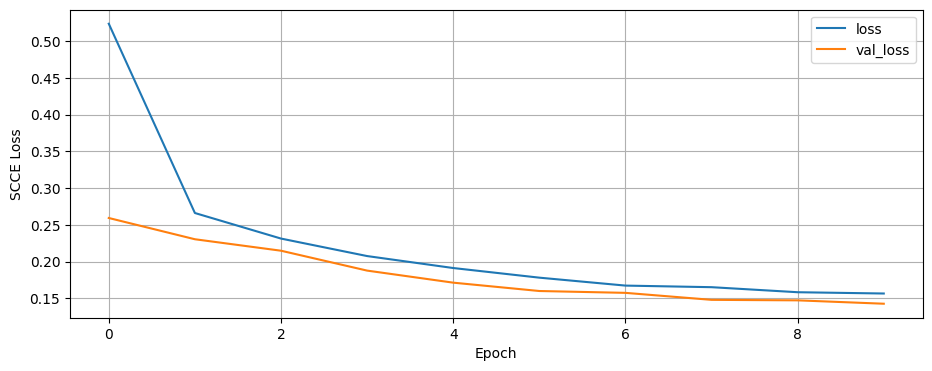

In [381]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

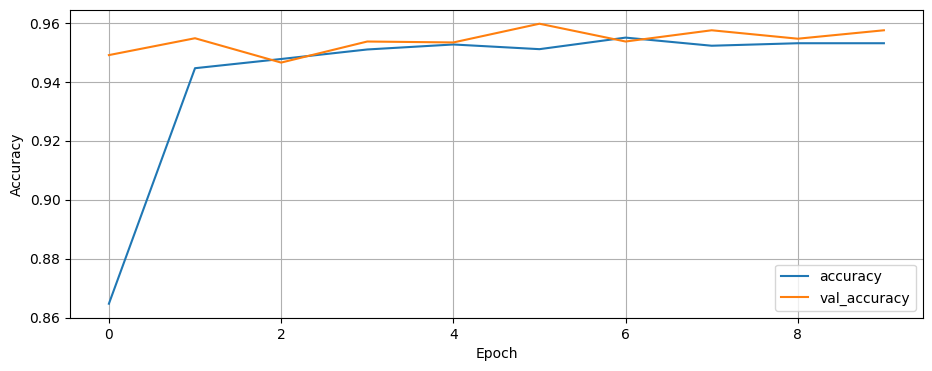

In [382]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [383]:
# Get predictions for train data
train_predictions = model.predict(X_train)
train_predictions = (train_predictions > 0.5).astype(int)

591/591 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [384]:
# Evaluate on Training Data
train_accuracy = metrics.accuracy_score(Y_train, train_predictions)
train_confusion_matrix = metrics.confusion_matrix(Y_train, train_predictions)
train_classification_report = metrics.classification_report(Y_train, train_predictions)

In [385]:
print('============================== FFNN Classifier Training Results ==============================')
print("Model Accuracy (Train Data):\n", train_accuracy)
print("\nConfusion matrix (Train Data):\n", train_confusion_matrix)
print("\nClassification report (Train Data):\n", train_classification_report)
print()

============================== FFNN Classifier Training Results ==============================
Model Accuracy (Train Data):
 0.9615751032073674

Confusion matrix (Train Data):
 [[8233  581]
 [ 145 9935]]

Classification report (Train Data):
               precision    recall  f1-score   support

           0       0.98      0.93      0.96      8814
           1       0.94      0.99      0.96     10080

    accuracy                           0.96     18894
   macro avg       0.96      0.96      0.96     18894
weighted avg       0.96      0.96      0.96     18894




In [386]:
print('============================== FFNN Classifier Training Results ==============================')
print("Model Accuracy (Train Data):\n", train_accuracy)
print("\nConfusion matrix (Train Data):\n", train_confusion_matrix)
print("\nClassification report (Train Data):\n", train_classification_report)
print()

============================== FFNN Classifier Training Results ==============================
Model Accuracy (Train Data):
 0.9615751032073674

Confusion matrix (Train Data):
 [[8233  581]
 [ 145 9935]]

Classification report (Train Data):
               precision    recall  f1-score   support

           0       0.98      0.93      0.96      8814
           1       0.94      0.99      0.96     10080

    accuracy                           0.96     18894
   macro avg       0.96      0.96      0.96     18894
weighted avg       0.96      0.96      0.96     18894




In [387]:
# Get predictions for test data
test_predictions = model.predict(X_test)
test_predictions = (test_predictions > 0.5).astype(int)

197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [388]:
# Evaluate on Test Data
test_accuracy = metrics.accuracy_score(Y_test, test_predictions)
test_confusion_matrix = metrics.confusion_matrix(Y_test, test_predictions)
test_classification_report = metrics.classification_report(Y_test, test_predictions)

In [389]:
print('============================== FFNN Classifier Test Results ==============================')
print("Model Accuracy (Test Data):\n", test_accuracy)
print("\nConfusion matrix (Test Data):\n", test_confusion_matrix)
print("\nClassification report (Test Data):\n", test_classification_report)

============================== FFNN Classifier Test Results ==============================
Model Accuracy (Test Data):
 0.9574468085106383

Confusion matrix (Test Data):
 [[2717  212]
 [  56 3313]]

Classification report (Test Data):
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      2929
           1       0.94      0.98      0.96      3369

    accuracy                           0.96      6298
   macro avg       0.96      0.96      0.96      6298
weighted avg       0.96      0.96      0.96      6298



<a id="7"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">7. Hybrid Model</h2>

In [390]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [391]:
# Initialize base models
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=0)
knn_model = KNeighborsClassifier(n_jobs=-1)

In [392]:
# Meta-model (Logistic Regression as an example)
meta_model = LogisticRegression()

In [393]:
# Create Stacking Classifier (combining Decision Tree and KNN)
stacked_model = StackingClassifier(
    estimators=[('Decision Tree', dt_model), ('KNN', knn_model)],
    final_estimator=meta_model
)

In [394]:
# Train the stacked model
stacked_model.fit(X_train, Y_train)

StackingClassifier(estimators=[('Decision Tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       random_state=0)),
                               ('KNN', KNeighborsClassifier(n_jobs=-1))],
                   final_estimator=LogisticRegression())

In [395]:
final_model = stacked_model
stacked_model = final_model

In [396]:
# Cross-validation score of the stacked model
stacked_scores = cross_val_score(stacked_model, X_train, Y_train, cv=10)
print('============================== Stacking Model Cross Validation ==============================')
print("Cross Validation Mean Score:\n", stacked_scores.mean())
print()

============================== Stacking Model Cross Validation ==============================
Cross Validation Mean Score:
 0.995448222933665



In [397]:
# Evaluate Stacked Model on Training Data
stacked_accuracy_train = accuracy_score(Y_train, stacked_model.predict(X_train))
stacked_confusion_matrix_train = confusion_matrix(Y_train, stacked_model.predict(X_train))
stacked_classification_train = classification_report(Y_train, stacked_model.predict(X_train))

In [398]:
print('============================== Stacking Model Training Evaluation ==============================')
print("Model Accuracy on Training Data:\n", stacked_accuracy_train)
print("\nConfusion Matrix on Training Data:\n", stacked_confusion_matrix_train)
print("\nClassification Report on Training Data:\n", stacked_classification_train)
print()

============================== Stacking Model Training Evaluation ==============================
Model Accuracy on Training Data:
 1.0

Confusion Matrix on Training Data:
 [[ 8814     0]
 [    0 10080]]

Classification Report on Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8814
           1       1.00      1.00      1.00     10080

    accuracy                           1.00     18894
   macro avg       1.00      1.00      1.00     18894
weighted avg       1.00      1.00      1.00     18894




In [399]:
# Evaluate Stacked Model on Test Data
stacked_accuracy_test = accuracy_score(Y_test, stacked_model.predict(X_test))
stacked_confusion_matrix_test = confusion_matrix(Y_test, stacked_model.predict(X_test))
stacked_classification_test = classification_report(Y_test, stacked_model.predict(X_test))

In [400]:
print('============================== Stacking Model Test Results ==============================')
print("Model Accuracy on Test Data:\n", stacked_accuracy_test)
print("\nConfusion Matrix on Test Data:\n", stacked_confusion_matrix_test)
print("\nClassification Report on Test Data:\n", stacked_classification_test)

============================== Stacking Model Test Results ==============================
Model Accuracy on Test Data:
 0.9947602413464592

Confusion Matrix on Test Data:
 [[2918   11]
 [  22 3347]]

Classification Report on Test Data:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2929
           1       1.00      0.99      1.00      3369

    accuracy                           0.99      6298
   macro avg       0.99      0.99      0.99      6298
weighted avg       0.99      0.99      0.99      6298



<a id="8"></a>
<h2 style = "font-size:30px; font-family:Garamond ; font-weight : bold; background-color: #007580; color :#fed049   ; text-align: center; border-radius: 5px 5px; padding: 10px">8. Pcikle File</h2>

In [401]:
pickle.dump(final_model,open('../models/model.pkl','wb'))